# Utilisation des mots ne figurant pas dans le dictionnaire français

## Paquets utilisés
On aura besoin des librairie externe: 
- [numpy](https://numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [matplotlib](https://matplotlib.org/)
- [wordcloud](https://amueller.github.io/word_cloud/)

In [503]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as ipw
from wordcloud import WordCloud
from typing import List

## Ouverture des fichiers contenant les données a utiliser

In [504]:
songs: pd.DataFrame
french: pd.Series
english: pd.Series

songs = pd.read_json("./datas/songs.json")

with open("./datas/french.txt", "r", encoding="utf8") as file:
        french = pd.Series(file.read().lower().splitlines())
        file.close()

# Generated with http://app.aspell.net/create
with open("./datas/english.txt", "r", encoding="utf8") as file:
        english = pd.Series(file.read().lower().splitlines())
        file.close()

## Séléction et manipulation des données afin de pouvoir les utiliser

In [505]:
# Group all the words of all the songs in a single pd.Serie
words: pd.Series = songs["lyrics_keywords"].apply(lambda x: x.split(" ")).explode()

# Number of every differents words in all lyrics
all_words_count=len(words)

# Count all the words in this array
occurences: pd.Series = words.value_counts()

# Create a Dataframe that contains the number of occurence
# and if the word is inside the french dictionary
data = {
    "count": occurences,
    "is_french": occurences.index.isin(french),
    "is_english": occurences.index.isin(english)
}

description = pd.DataFrame(
    data=data,
    columns=["count", "is_french", "is_english"],
    index=
)

#Select all the words and their count
words_count = pd.Series(description["count"], description.index)

# Select only the words that aren't french
not_french = description[description["is_french"] == False]
not_french = not_french[not_french["is_english"] == False]

frequency = pd.Series(not_french["count"], index=not_french.index)

with open("./datas/not_french.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

not_french

,count,is_french,is_english
p'tit,251,False,False
biff,246,False,False
wesh,164,False,False
igo,138,False,False
yah,131,False,False
...,...,...,...
fteh,1,False,False
bienv'nu,1,False,False
troismillesseudi,1,False,False
manaudou,1,False,False


Ceci est la liste des mots de figurant pas dans le dictionnaire france avec leurs occurences (globale, parmis toutes les musiques)

## Recherche d'un mot particulier et pourcentage

In [506]:
# Textbox creation
word_textbox = ipw.Text(value="", placeholder="Search word", description="Word to count:", disabled=False)

# Function called when the button is clicked
def textbox_changed(word: str):
    word_searched = word.lower().strip()

    if word_searched in words_count:
        #number of times used
        print(f"The word \"{word_searched}\" is used {words_count[word_searched]} times in all the lyrics\n")
        #percentage of use
        percentage_used_word = round(words_count[word_searched] / all_words_count * 100, 2)
        print(f"Percentage of use: {percentage_used_word}%")
    else:
        print(f"The word \"{word_searched}\" is not in any lyrics")

# Button interaction
ipw.interact_manual(textbox_changed, word=word_textbox.value)

interactive(children=(Text(value='', description='word'), Button(description='Run Interact', style=ButtonStyle…

<function __main__.textbox_changed(word: str)>

## WordCloud, plus le mot est grand, plus il est utilisé

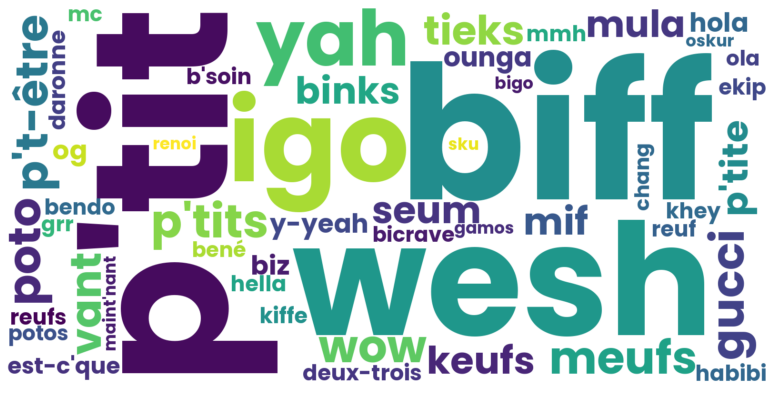

In [507]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme des mots

<AxesSubplot:>

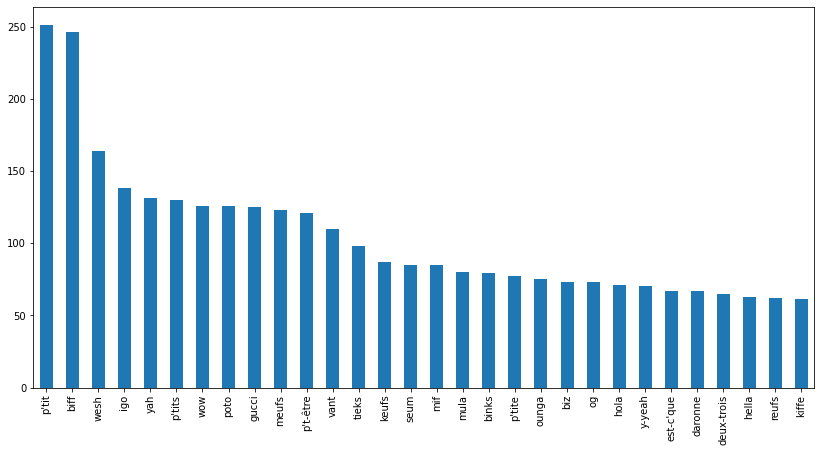

In [508]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

# Les anglicismes

In [509]:
english_words = description[description["is_french"] == False]
english_words = english_words[english_words["is_english"] == True]

frequency = pd.Series(english_words["count"], index=english_words.index)

with open("./datas/english_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

english_words

,count,is_french,is_english
yeah,1556,False,True
hey,1002,False,True
fuck,428,False,True
up,285,False,True
the,268,False,True
...,...,...,...
dams,1,False,True
water,1,False,True
swagger,1,False,True
regular,1,False,True


## WordCloud, plus le mot est grand, plus il est utilisé

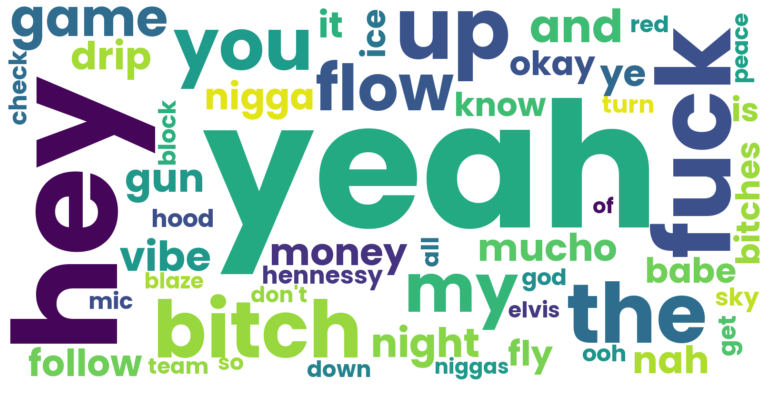

In [510]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:>

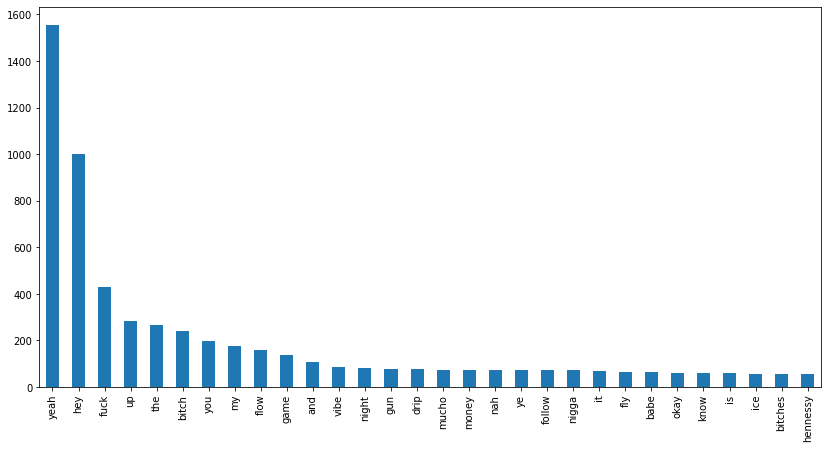

In [511]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

# Français de france !

In [512]:
french_words = description[description["is_french"] == True]
banned_french_words: pd.Series

with open("./datas/french_words.csv", "w", encoding="utf8") as f:
        f.write(frequency.to_csv())
        f.close()

with open("./datas/banned_french_words.txt", "r", encoding="utf8") as f:
        banned_french_words = pd.Series(f.read().lower().splitlines())
        f.close()

not_banned = pd.Series(french_words.index).isin(banned_french_words)
not_banned.index = french_words.index
french_words.insert(0, "not_banned", not_banned)
french_words = french_words[french_words["not_banned"] == True]

frequency = pd.Series(french_words["count"], index=french_words.index)

french_words

,not_banned,count,is_french,is_english
faire,True,2423,True,False
toi,True,1171,True,False
jamais,True,1026,True,False
temps,True,994,True,True
toujours,True,956,True,False
...,...,...,...,...
conçoit,True,1,True,False
amaigrir,True,1,True,False
contacte,True,1,True,False
gravats,True,1,True,False


## WordCloud, plus le mot est grand, plus il est utilisé

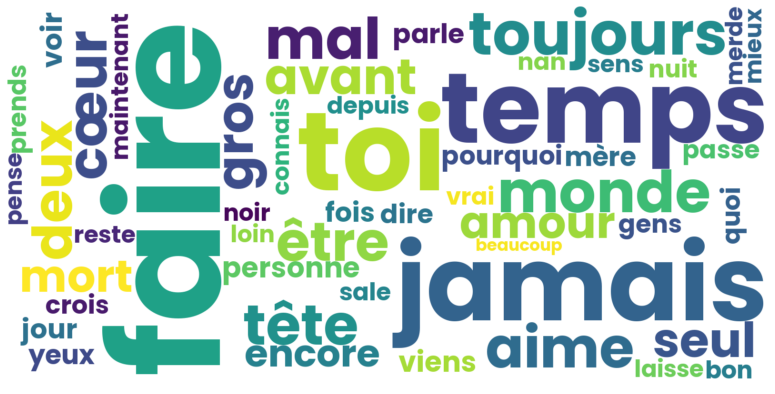

In [513]:
wordcloud = WordCloud(
    font_path="./medias/poppins.ttf",
    background_color="white",
    width=1600,
    height=800,
    max_words=50
).generate_from_frequencies(frequency.to_dict())

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Histogramme

<AxesSubplot:>

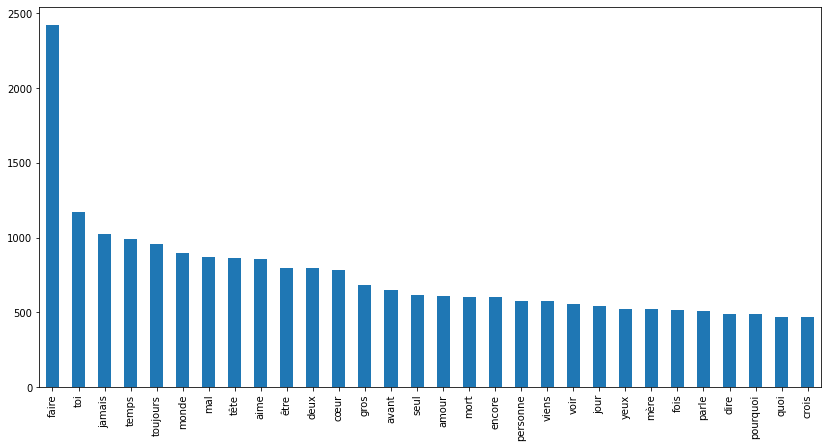

In [514]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Histogramme des mots

<AxesSubplot:>

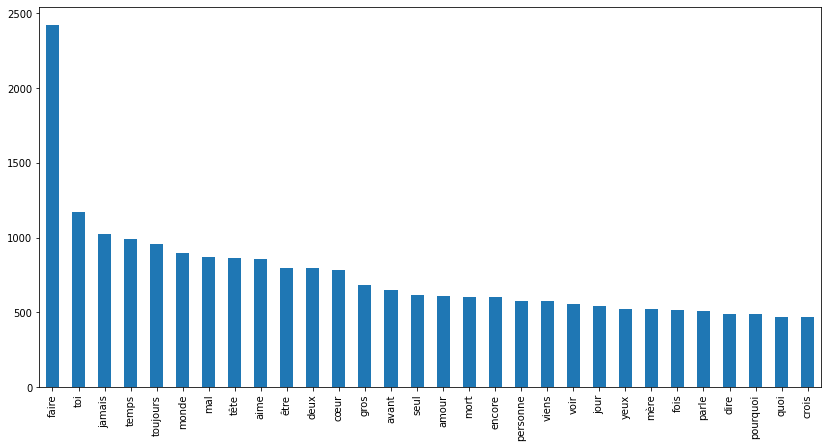

In [515]:
frequency.head(30).plot(kind="bar", figsize=(14, 7))

## Language

([<matplotlib.patches.Wedge at 0x1825072bb80>,
 [Text(-0.6401968363575246, 0.8945099276798536, 'French'),
  Text(-0.11489365199287904, -1.0939832945396102, 'English'),
  Text(0.8227494399609057, -0.7301255775851276, 'Other (slang)')],
 [Text(-0.34919827437683154, 0.4879145060071928, ' 69.8%'),
  Text(-0.06266926472338856, -0.5967181606579691, ' 7.1%'),
  Text(0.44877242179685756, -0.3982503150464332, ' 23.1%')])

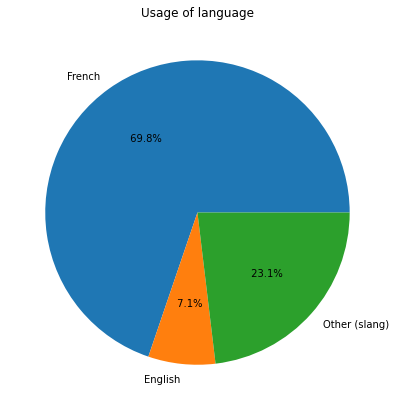

In [516]:
# Count number of words by language
french_words_count = len(description[description["is_french"] == True])
english_words_count = len(english_words)
other_words_count = len(not_french)

datas = [french_words_count, english_words_count, other_words_count]
labels = ["French", "English", "Other (slang)"]

plt.figure(figsize=(14, 7))
plt.title("Usage of language")

plt.pie(datas, labels=labels, autopct='% 1.1f%%')